In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

import cvxpy as cp
from cvxpylayers.torch import CvxpyLayer

from util.collision_loss import torch_collision_check
from util.zonotope import Zonotope, TorchZonotope
from util.constrained_zonotope import ConstrainedZonotope, TorchConstrainedZonotope
from util.NN_con_zono import forward_pass_NN_con_zono, forward_pass_NN_con_zono_torch

# Neural network reachability

In [2]:
# Toy 2 Layer network
# 2 - 3 - 2

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(2, 3)  
        self.fc2 = nn.Linear(3, 2)  

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

In [3]:
# extract weights and biases from network
NN_weights = []
NN_biases = []

idx = 0
for param in net.parameters():
    if idx % 2 == 0: # "even" parameters are weights
        NN_weights.append(param)
    else: # "odd" parameters are biases
        NN_biases.append(param[:,None])
    idx += 1

# input zonotope
Z_in = TorchZonotope(torch.zeros(2,1),torch.eye(2))

In [4]:
t_start = timer()
Z_out = forward_pass_NN_con_zono_torch(Z_in, NN_weights, NN_biases)
t_end = timer()
print("elapsed time (s): ", t_end - t_start)

elapsed time (s):  0.03099459999998544


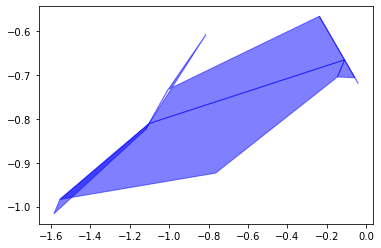

In [8]:
# plot output zonotopes
fig, ax = plt.subplots()
for z in Z_out:
    z.to_np().plot(ax)